In [1]:
##import packages
import pandas as pd #required to read data into a data table structure and manipulate it
import numpy as np #required for everything concerning numerical manipulations of data structures

In [2]:
##read data via pandas package
#pd.read_csv requires the data to be comma separated (meaning: sep="," is default)
#If you have another separator (e.g. tabstop), use the sep parameter (e.g. sep="\t")
#Complete documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
#We save the training data set in the dataframe "train" and the test dataset in the dataframe "test"
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
##print out the shape (rows and columns) of the data set
#we use the *.shape function that gives the shape of a dataset in form of an array
#the first element of the array shows us the rows and the second shows us the columns
#we can use array indexing to receive the specific number of rows and features
#IMPORTANT(IMP): indexing in python starts with 0 
print ("Train rows:", train.shape[0], "Train features:",train.shape[1] )
print ("Test rows:", test.shape[0], "Test features:",test.shape[1] )

Train rows: 1460 Train features: 81
Test rows: 1459 Test features: 80


In [13]:
##display part of the data set, default is 5 rows
#the argument of head() defines the number of rows displayed
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
##import packages for plotting data
#matplotlib is a nice package for plotting everything we need
import matplotlib.pyplot as plt
plt.style.use(style='ggplot') #we define the style of ggplot, that contains line styles, colors, etc.. nice to look at
plt.rcParams['figure.figsize'] = (10, 6) #we define the size of every figure to be 10 by 6 inches (width x height)

In [15]:
##generate descriptive statistics
#*.describe shows several descriptive statistics like mean, std deviation, etc.
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


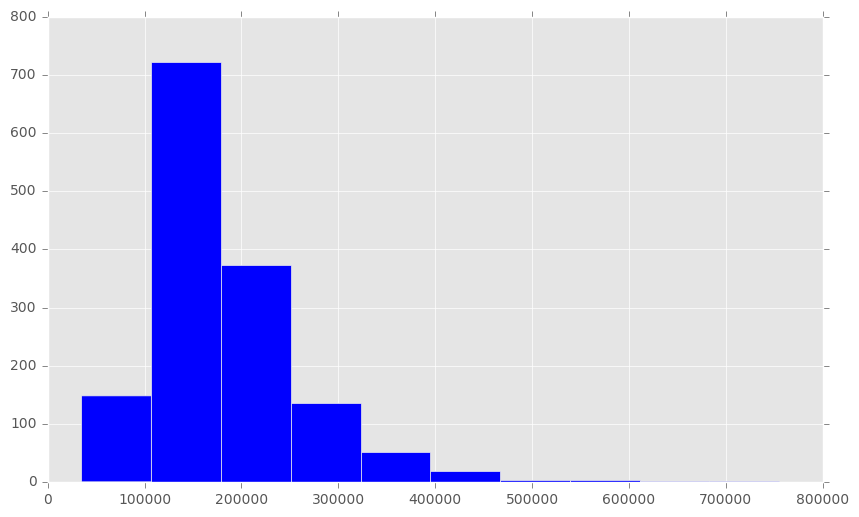

In [16]:
##generate skewness statistics and plotting histogram
print ("Skew is:", train.SalePrice.skew()) #*.skew() shows skewness (0=no skewness)
#plotting the histogram
#plt.hist needs argument "data" in form of a 1d numpy array
#we can adress columns as numpy arrays by just adding their name to the data frame (e.g. df.variable_name)
#we choose the parameter color to be blue --> blue histogram
plt.hist(train.SalePrice, color='blue')
# whenever we are rdy with all our charts, we can display them with plt.show()
plt.show()

Skew is: 0.121335062205


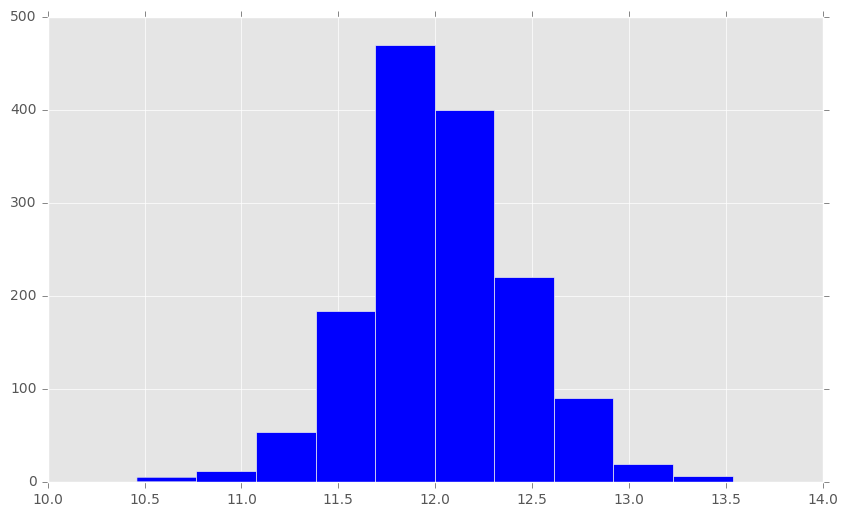

In [17]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

In [20]:
##selecting all numerical variables
#use *.select_dtypes with either include or exclude argument and the dtype
#for more information on dtypes see: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html
#we want to select all numerical attributes, so we select all varaibles that are saved as numbers by numpy ( np.number)
numeric_features = train.select_dtypes(include=[np.number])
##Correlation with y
#generate correlation matrix 81x81 in our case
corr = numeric_features.corr()
#we only need the column SalePrice to display correlations with y -->corr['SalePrice']
#we sort the result descending corr['SalePrice'].sort_values(ascending=False) 
#and from those sorted array we select the first 5 and the last 5 and print them
#\n just prints an empty line for spacing
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [21]:
##get unique values from the top correlated variable OverallQual
#vectors can contain all sorts of numbers, if we want to only get an overview which values appear we use *.unique()
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [23]:
## we want to display the denpendency between SalePrice and OverallQual based on the unique values
#We use pivot function, that just aggregates the VALUES of one variable over all rows
#... for every unique value of the specific INDEX variable with an aggregation function (=aggfunc)
#in our case we just want the values of SalePrice to be aggregated for all unique values of OverallQual using median function
quality_pivot = train.pivot_table(index='OverallQual',
                                  values='SalePrice', aggfunc=np.median)
quality_pivot

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64

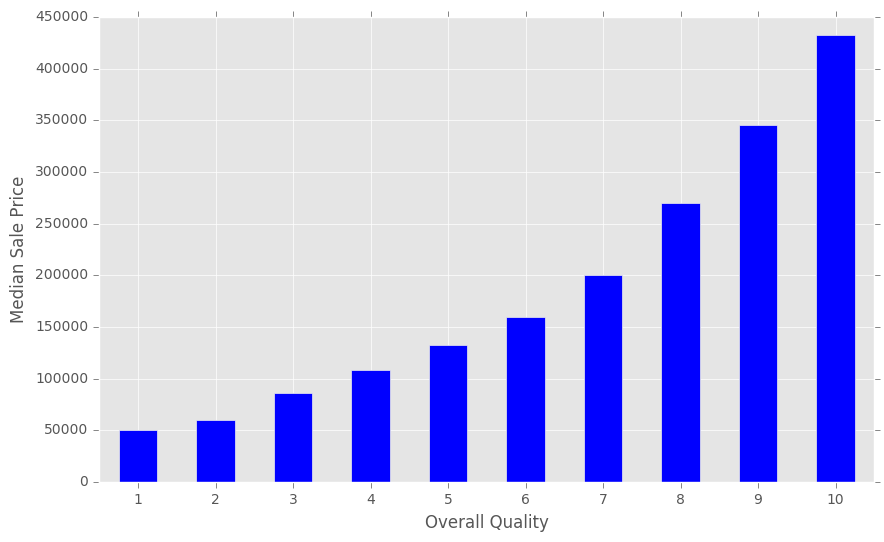

In [24]:
##plot the pivot table
#bar plot with *.plot, kind=type in this case bar, color is blue again
quality_pivot.plot(kind='bar', color='blue')
#label for x and y axis
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
#we do not rotate the x axis tick labels
plt.xticks(rotation=0)
plt.show()

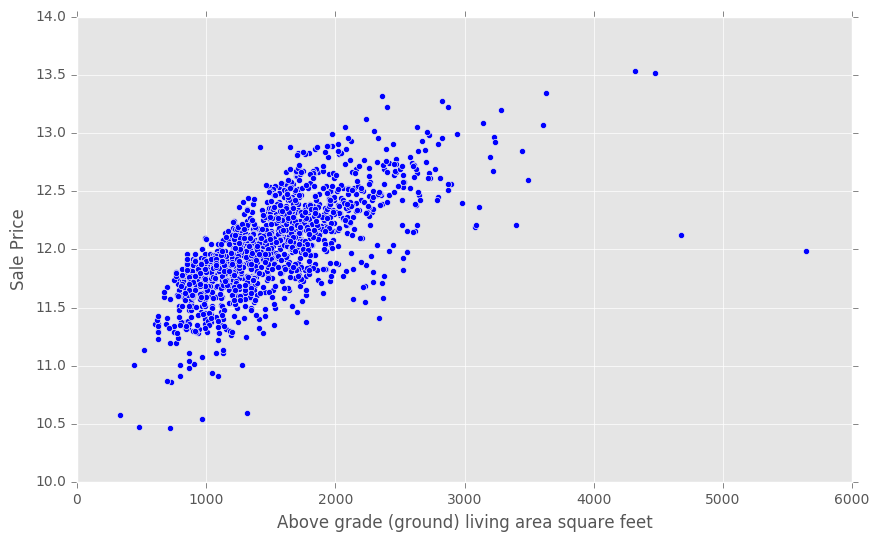

In [25]:
##Plot correaltion between Living area and Price in a scatter plot
#use plt.scatter needs two arguments: x and y
#x=Living Area and y is our log transformed SalePrice variable (=target)
plt.scatter(x=train['GrLivArea'], y=target)
#label of y axis
plt.ylabel('Sale Price')
#label of x axis
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

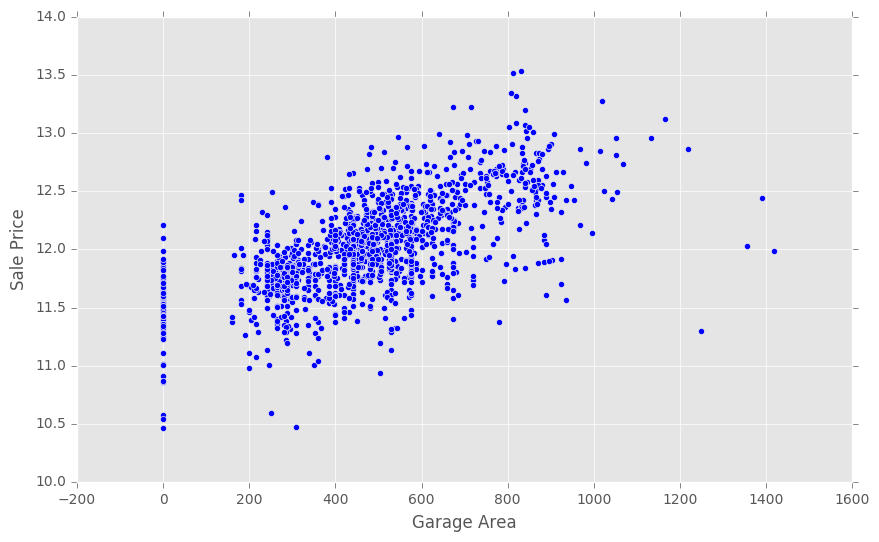

In [26]:
## We are gonna do the same for GarageArea
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

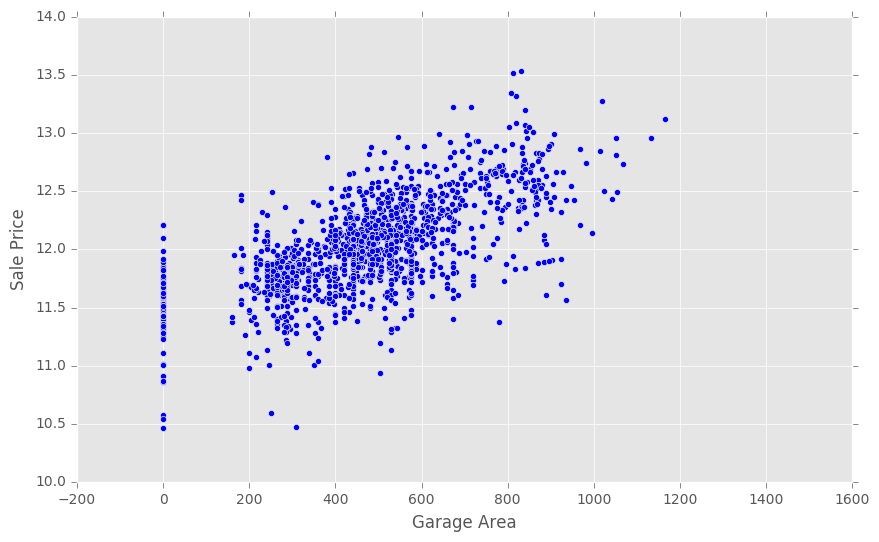

In [27]:
##we remove high valued outliers
#we can use indexing based on the array itself to only select cases with areas <1200
train = train[train['GarageArea'] < 1200]
#we plot everything as before
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before (to compare)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [28]:
##create dataframe to show features with the most null values
#we use the function *.isnull to select all rows with nulls in them
#we sum the number of nulls over all rows for every feature and sort them descending and display top 25
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
#We have only one column with the name null count and we will index the data frame by the features (rows)
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [35]:
##we remove all missing values
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
#we sum over all missing values, should be 0 now
sum(data.isnull().sum() != 0)

0

In [30]:
##dummy encoding
#print the number of values for all possible values the nominal variable Street can take
print ("Original: \n") 
print (train.Street.value_counts(), "\n")
#algorithms usually can not handle words in columns, so we use 1-hot dummy encoding
#1-hot encoding means we create a vector with the length of all possible values
#... and put a 1 in there when the value is equal to the value of the object ID and 0 otherwise
#in this case 2 values: gravl and pave--> 1-hot vector for pave (1) we only need one scalar (0)
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
#check whether we still have the same distribution
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 

Encoded: 

1.0    1450
0.0       5
Name: enc_street, dtype: int64


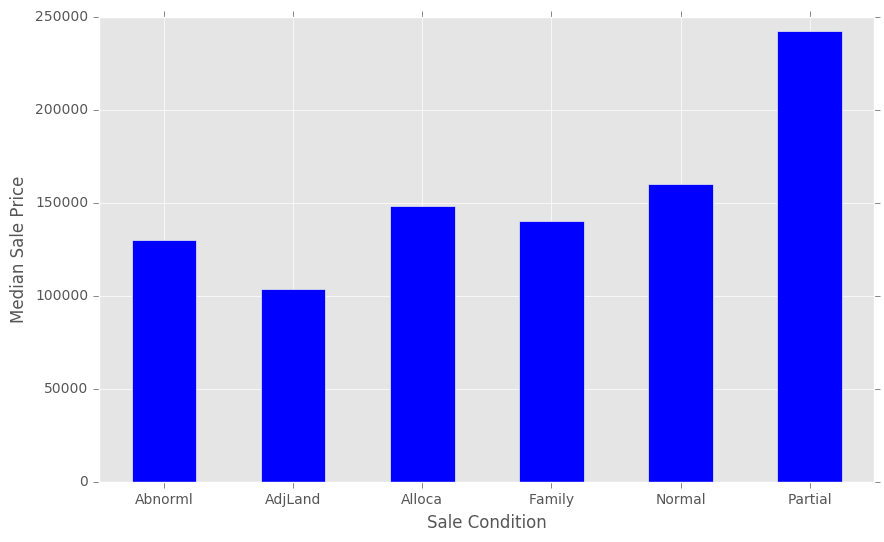

In [31]:
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [32]:
##new features that takes on 1 if Sale Condition=Partial and 0 else
#we define new function, that we can apply to both training AND test data
def encode(x): return 1 if x == 'Partial' else 0
#We apply the simple function to both data sets
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

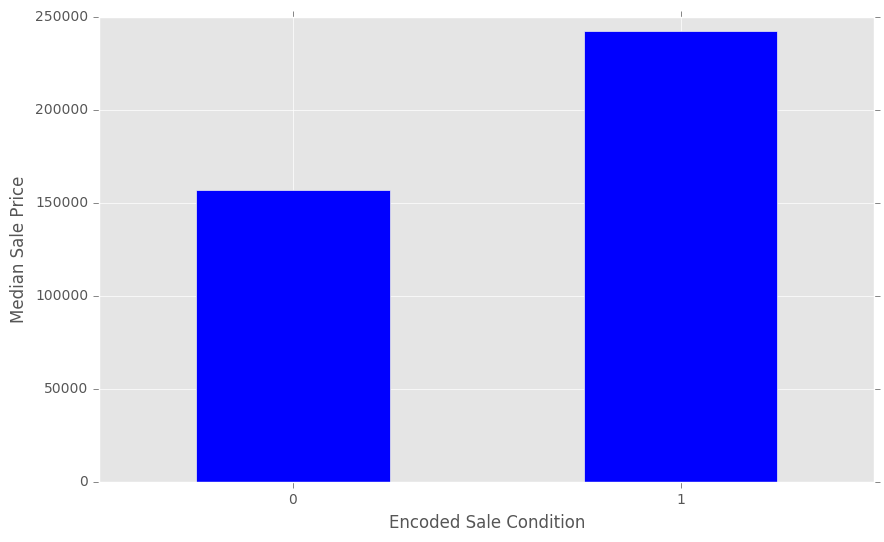

In [33]:
##As before we plot the dependency between the new feature and our SalePrice
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [36]:
## We put X and y in different arrays
#y equals the column sales price transformed by log
y = np.log(train.SalePrice)
#X is jsut the data frame reduced by our y varaible "SalesPrice" and the "ID" column
X = data.drop(['SalePrice', 'Id'], axis=1)

In [37]:
##Split the training data into training and test data
#import sklearn split function
from sklearn.model_selection import train_test_split
#split into 4 parts: train and test for y and X with random seed =42 and % of training =0.77
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [39]:
## load package and create linear regression model
from sklearn import linear_model
lr = linear_model.LinearRegression()
#fit the model to our data
model = lr.fit(X_train, y_train)

In [41]:
##Evaluate Performance
#Rsquared on training data
print ("R^2 is: \n", model.score(X_test, y_test))
#RMSE on test data
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.888247770926
RMSE is: 
 0.0178417945196


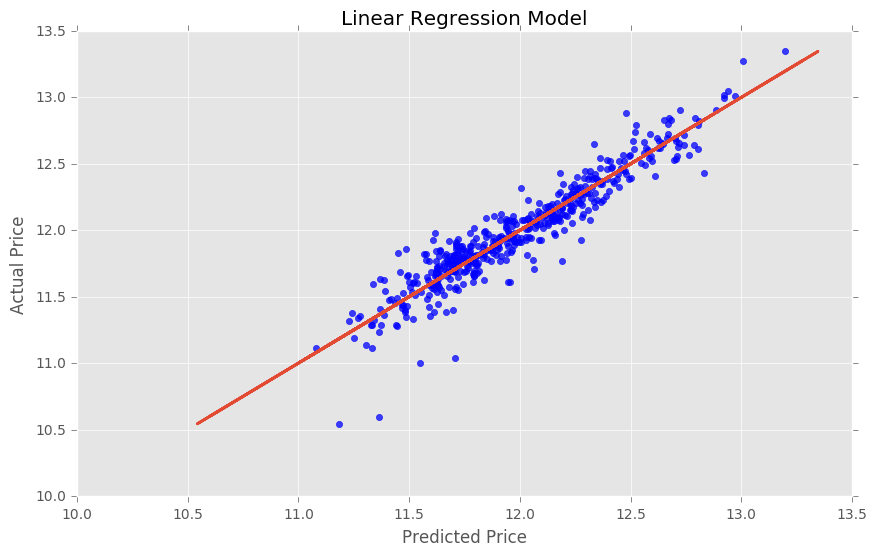

In [43]:
##plot acutal y of test data set vs predicted y
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
#45 degree line where y predicted would be the same as y
plt.plot(y_test, y_test, linewidth=2.0)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [ ]:
##solution to the ridge regression task
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()